In [4]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import joblib

In [41]:
shit_df = pd.read_pickle("./data/step6_problem_doe.pkl")
shit_df.columns

Index(['GEOID', 'city', 'county', 'county_fips', 'state_code', 'state_fips',
       'state', 'cbsa', 'cbsa_name', 'DAC_status',
       'lowincome_ami_pct_natl_pctile', 'DAC_score',
       'tract_national_percentile', 'tract_state_percentile',
       'over64_pct_natl_pctile', 'disability_pct_natl_pctile',
       'lessHS_pct_natl_pctile', 'nongrid_heat_pct_natl_pctile',
       'uninsured_pct_natl_pctile', 'linguistic_isolation_pct_natl_pctile',
       'mobile_home_pct_natl_pctile', 'incomplete_plumbing_pct_natl_pctile',
       'renters_pct_natl_pctile', 'single_parent_pct_natl_pctile',
       'unemployed_pct_natl_pctile', 'lead_paint_pct_natl_pctile',
       'no_car_pct_natl_pctile', 'no_internet_pct_natl_pctile',
       'over_30min_commute_pct_natl_pctile', 'lowincome_fpl_pct_natl_pctile',
       'avg_housing_burden_natl_pctile', 'job_access_natl_pctile',
       'avg_transport_burden_natl_pctile', 'unhoused_pct_natl_pctile',
       'avg_energy_burden_natl_pctile', 'fossil_emp_rank_natl_

In [44]:
my_df = pd.read_pickle("./data/step6_problem_doe.pkl")
# my_df.head()

# CA MAYBE DIFFERENT
# Shorten columns
selected_columns = ['DAC_status', 
                    'DAC_score', 
                    'wilson_lower', 
                    'GPTSentiment', 
                    ]

# DAC COLUMNS
DAC_columns = ['lowincome_ami_pct_natl_pctile', 
       'tract_national_percentile', 'tract_state_percentile',
       'over64_pct_natl_pctile', 'disability_pct_natl_pctile',
       'lessHS_pct_natl_pctile', 'nongrid_heat_pct_natl_pctile',
       'uninsured_pct_natl_pctile', 'linguistic_isolation_pct_natl_pctile',
       'mobile_home_pct_natl_pctile', 'incomplete_plumbing_pct_natl_pctile',
       'renters_pct_natl_pctile', 'single_parent_pct_natl_pctile',
       'unemployed_pct_natl_pctile', 'lead_paint_pct_natl_pctile',
       'no_car_pct_natl_pctile', 'no_internet_pct_natl_pctile',
       'over_30min_commute_pct_natl_pctile', 'lowincome_fpl_pct_natl_pctile',
       'avg_housing_burden_natl_pctile', 'job_access_natl_pctile',
       'avg_transport_burden_natl_pctile', 'unhoused_pct_natl_pctile',
       'avg_energy_burden_natl_pctile', 'fossil_emp_rank_natl_pctile',
       'coal_emp_rank_natl_pctile', 'grid_outages_county_natl_pctile',
       'grid_outage_duration_natl_pctile', 'fema_loss_of_life_natl_pctile',
       'green_space_natl_pctile', 'food_desert_pct_natl_pctile',
       'ej_diesel_natl_pctile', 'ej_cancer_natl_pctile',
       'ej_traffic_natl_pctile', 'ej_water_natl_pctile', 'ej_npl_natl_pctile',
       'ej_remediation_natl_pctile', 'ej_tsdf_natl_pctile',
       'ej_pm25_natl_pctile']

# COMMENT
selected_columns = selected_columns + DAC_columns

short_df = my_df[selected_columns]
short_df

# Find ratios of 1, 0, and nan and drop points with 0 GPTSentiment counts
shit = short_df.dropna(subset = ['GPTSentiment'], ignore_index=False)
def count1(ls):
    return ls.count('1')
def count0(ls):
    return ls.count('0')
def countNan(ls):
    return ls.count('nan')

# Get number of 1, 0 and nan comments, respectively
shit['GPT_1'] = shit['GPTSentiment'].map(count1)
shit['GPT_0'] = shit['GPTSentiment'].map(count0)
shit['GPT_nan'] = shit['GPTSentiment'].map(countNan)
shit['GPT_len'] = shit['GPTSentiment'].map(len)
short_df = shit.loc[shit['GPT_len'] > 0]

# Compute Bernoulli distri. p values, effective length (length without nan)
short_df['p_Bernoulli'] = short_df['GPT_1'] / (short_df['GPT_1'] + short_df['GPT_0'])
short_df['nan_percentage'] = (short_df['GPT_nan']) / short_df['GPT_len']
short_df['eff_len'] = short_df['GPT_1'] + short_df['GPT_0']

# Unbiased variance of estimated p_Bernoulli, 
short_df['p_Bernoulli_variance'] = short_df['p_Bernoulli'] * (1 - short_df['p_Bernoulli']) \
                                   / (short_df['eff_len'] - 1)

# Drop rows with zero effective length, zero variance (since that usually implies very limited effective len)
short_df = short_df.dropna(subset = ['p_Bernoulli_variance'])
short_df = short_df.loc[short_df['p_Bernoulli_variance'] > 0.]
short_df = short_df.loc[short_df['eff_len'] > 1].reset_index(drop=True)

# Show short_df after processing
short_df

<ipython-input-44-a30d204df05e>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shit['GPT_1'] = shit['GPTSentiment'].map(count1)
<ipython-input-44-a30d204df05e>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shit['GPT_0'] = shit['GPTSentiment'].map(count0)
<ipython-input-44-a30d204df05e>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,DAC_status,DAC_score,wilson_lower,GPTSentiment,lowincome_ami_pct_natl_pctile,tract_national_percentile,tract_state_percentile,over64_pct_natl_pctile,disability_pct_natl_pctile,lessHS_pct_natl_pctile,...,ej_tsdf_natl_pctile,ej_pm25_natl_pctile,GPT_1,GPT_0,GPT_nan,GPT_len,p_Bernoulli,nan_percentage,eff_len,p_Bernoulli_variance
0,1,18.314600,0.197638,"[1, 0, 1, nan, nan, 0, 1, 1, 1, nan, 0, 0]",0.637707,0.695599,0.872508,0.934570,0.926562,0.779536,...,0.239272,0.175535,5,4,3,12,0.555556,0.250000,9,0.030864
1,1,17.569194,0.207660,"[1, nan, 0, nan, 1]",0.546327,0.614646,0.806401,0.802286,0.676080,0.736623,...,0.355841,0.237030,2,1,2,5,0.666667,0.400000,3,0.111111
2,0,16.366446,0.308566,"[1, nan, nan, nan, nan, nan, 1, 1, 0, 0, 0, 0,...",0.597759,0.478557,0.682581,0.203025,0.529971,0.594251,...,0.394785,0.258322,14,13,44,71,0.518519,0.619718,27,0.009602
3,0,14.522346,0.299993,"[0, 0, 1, 1, nan, 1, 1, nan]",0.562977,0.270878,0.469045,0.186763,0.301567,0.365451,...,0.485141,0.258529,4,2,2,8,0.666667,0.250000,6,0.044444
4,0,19.161202,0.293232,"[nan, 1, nan, 1, 1, 0, 1, 1, nan, nan, 1, nan,...",0.574100,0.776155,0.930745,0.936486,0.776442,0.391595,...,0.366956,0.257713,49,34,34,117,0.590361,0.290598,83,0.002949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13320,1,22.946874,0.296827,"[0, 0, 0, 0, nan, 1, nan, 1, nan, 0, 1, 1, 0, ...",0.975538,0.971241,0.998984,0.230484,0.801369,0.947464,...,0.831907,0.947456,19,25,6,50,0.431818,0.120000,44,0.005706
13321,0,18.724017,0.512084,"[0, 0, nan, 1, nan, nan, 1, nan, nan, 1, nan, ...",0.875944,0.735569,0.792683,0.397851,0.774403,0.413196,...,0.455506,0.938449,14,5,13,32,0.736842,0.406250,19,0.010773
13322,0,17.290592,0.353835,"[nan, 0, 0, nan, 1, nan, 1, nan, nan, nan, 1, ...",0.891832,0.584587,0.622967,0.059339,0.276463,0.233619,...,0.532530,0.930481,28,14,15,57,0.666667,0.263158,42,0.005420
13323,1,21.109204,0.358934,"[1, nan, nan, nan, nan, 1, nan, 0, 1, nan, 0, ...",0.897552,0.908849,0.978659,0.209363,0.729861,0.296421,...,0.828444,0.946142,5,2,10,17,0.714286,0.588235,7,0.034014


<ipython-input-45-a0496da2edc6>:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


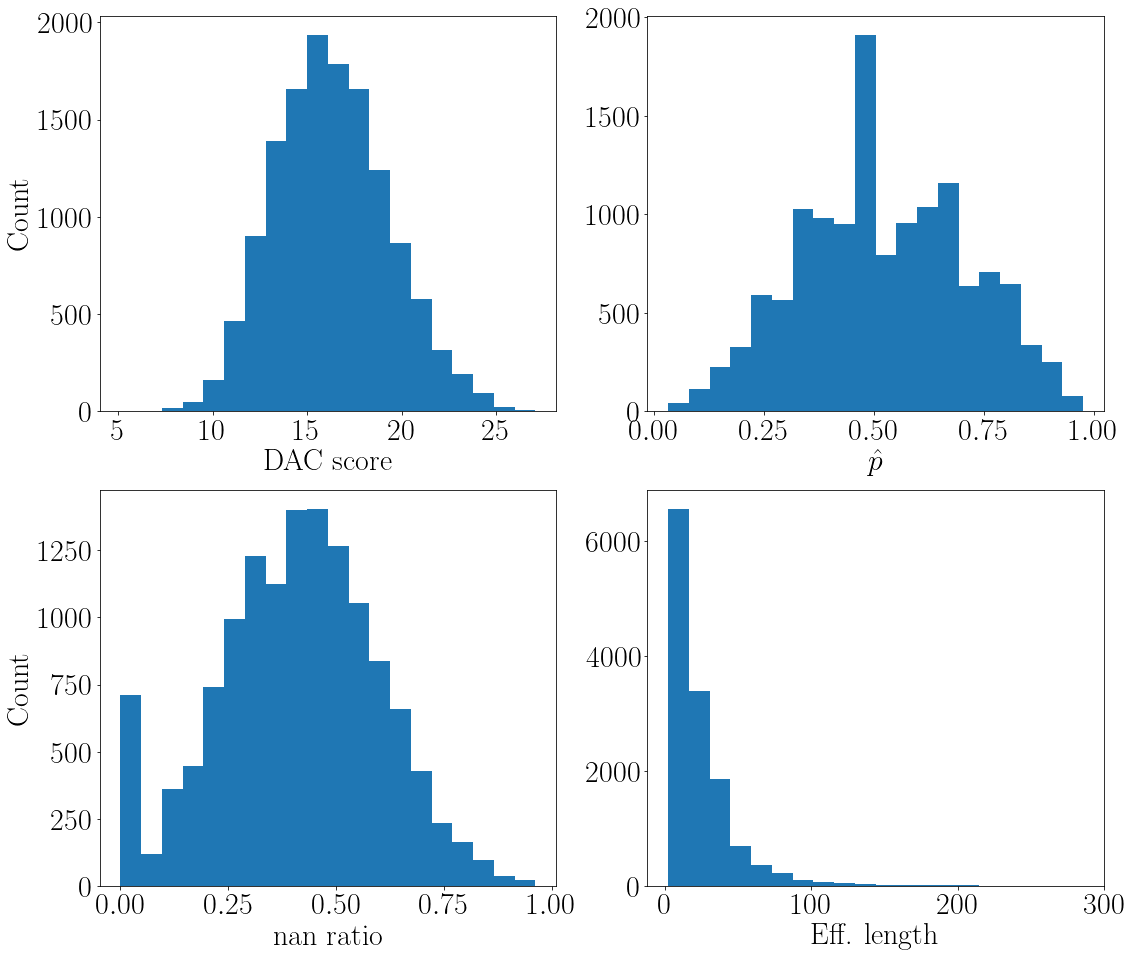

In [45]:
# Show demographics of dataset
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Specify properties of histograms
fsize = 30
n_bins = 20
densityFlag = False

y_label = "Density" if densityFlag else "Count" 

# Initialize subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 16))
axs[0][0].tick_params(axis='both', which='major', labelsize=fsize)
axs[0][1].tick_params(axis='both', which='major', labelsize=fsize)
axs[1][0].tick_params(axis='both', which='major', labelsize=fsize)
axs[1][1].tick_params(axis='both', which='major', labelsize=fsize)


# ------------------------------------------------------------------------- #
# Plot histograms for DAC_score, p_Bernoulli, nan_percentage, eff_len
# ------------------------------------------------------------------------- #

# Dac_score
axs[0][0].hist(short_df['DAC_score'].values, bins=n_bins, density=densityFlag)
axs[0][0].set_xlabel("DAC score", fontsize=fsize)
axs[0][0].set_ylabel(y_label, fontsize=fsize)

# p_Bernoulli
axs[0][1].hist(short_df['p_Bernoulli'].values, bins=n_bins, density=densityFlag)
axs[0][1].set_xlabel("$\hat{p}$", fontsize=fsize)
# axs[0][1].set_ylabel("Counts", fontsize=fsize)

# nan_percentage
axs[1][0].hist(short_df['nan_percentage'].values, bins=n_bins, density=densityFlag)
axs[1][0].set_xlabel("nan ratio", fontsize=fsize)
axs[1][0].set_ylabel(y_label, fontsize=fsize)

# eff_len
axs[1][1].hist(short_df['eff_len'].values, bins=n_bins, density=densityFlag)
axs[1][1].set_xlabel("Eff. length", fontsize=fsize)
# axs[1][1].set_ylabel("Counts", fontsize=fsize)

fig.show()

# Weighted linear regression between $\{y_i=\hat{p}_i\}'s$ and DAC score $\{x_i\}'s$
It seems that distribution of DAC score is close to normal, so is $\hat{p}$. 
Given that we have an estimate for $\text{Var}[y_i]$, we assume that 
    \begin{align}
        y_i = \beta x_i + b + \varepsilon_i, 
    \end{align}
where $\text{Var}[\varepsilon_i] = \text{Var}[y_i] = s_i^2$. 
Then weighted linear regression tries to find $\beta, b \in \mathbb{R}$ such that 
    \begin{align*}
        OLS(X, y) = \sum_{i=1}^N \left(\frac{y_i - \beta x_i - b}{\varepsilon_i}\right)^2
    \end{align*}
is minimized. 

In practice, 
define
    \begin{align}
        \tilde{y}_i &= y_i / s_i, \\
        \tilde{x}_i &= X_i / s_i, \\
        \tilde{b}_i &= b_i / s_i, \\
        \tilde{\varepsilon}_i &= \varepsilon_i / s_i, 
    \end{align}
then the weighted linear regression becomes a standard linear regression minimizing $OLS\left(\tilde{X}, \tilde{y}\right)$. 

In [46]:
# First isolate yi, xis from the dataset
y = short_df['p_Bernoulli'].values
X = short_df['DAC_score'].values
s = np.sqrt(short_df['p_Bernoulli_variance'].values)
# s = 1.

# Compute tildes
y_tilde = y / s
X_tilde = X / s

# Linear regression on X_tilde, y_tilde
from scipy.stats import linregress
res = linregress(X_tilde, y_tilde)
print("-" * 40)
print("Regressing tilde{y} on tilde{X}:")
print("slope, intercept: ", res.slope, "    ", res.intercept)
print("R^2:", res.rvalue ** 2)

# Linear regression on X, y
res = linregress(X, y)
print("-" * 40)
print("Regressing y on X:")
print("slope, intercept: ", res.slope, "    ", res.intercept)
print("R^2:", res.rvalue ** 2)

----------------------------------------
Regressing tilde{y} on tilde{X}:
slope, intercept:  0.027151923022708985      0.7907707618763764
R^2: 0.43801462279464265
----------------------------------------
Regressing y on X:
slope, intercept:  -0.006964686968450948      0.6385922041463873
R^2: 0.012248856179959458


For linear regression one can show that 
\begin{align}
    R^2\left(\tilde{X}, \tilde{y}\right) = \frac{\text{Corr}\left(\tilde{X}, \tilde{y}\right)}{\sqrt{\text{Var}\left[\tilde{X}\right]\text{Var}\left[\tilde{y}\right]}} = \rho\left(\tilde{X}, \tilde{y}\right), 
\end{align}
and a correlation of 0.438 between $\tilde{X}, \tilde{y}$ and 0.012 between $X, y$ shows they are almost uncorrelated. 

<ipython-input-37-dc4a43fd79d4>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


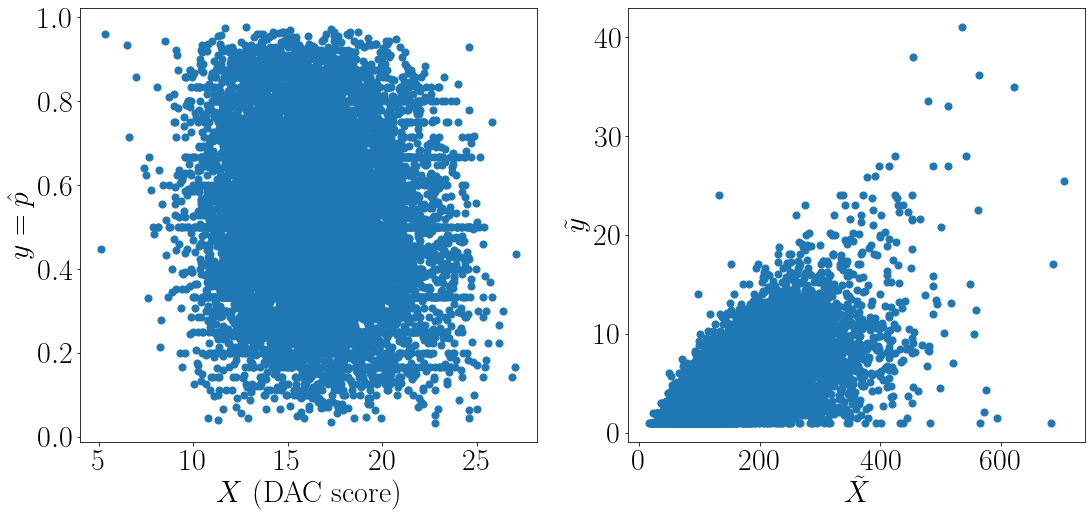

In [37]:
# Plot the y against X, \tilde{y} against \tilde{X}
fig, axs = plt.subplots(1, 2, figsize=[18, 8])
axs[0].tick_params(axis='both', which='major', labelsize=fsize)
axs[1].tick_params(axis='both', which='major', labelsize=fsize)

# y, X
axs[0].scatter(X, y, s = 50)
axs[0].set_xlabel('$X$ (DAC score)', fontsize=fsize)
axs[0].set_ylabel('$y=\hat{p}$', fontsize=fsize)

# \tilde(y), \tilde(X)
axs[1].scatter(X_tilde, y_tilde, s = 50)
axs[1].set_xlabel('$\\tilde{X}$', fontsize=fsize)
axs[1].set_ylabel('$\\tilde{y}$', fontsize=fsize)
fig.show()

# XGBoost identifying the most important feature

In [51]:
# Define X, y for XGBoost
X_df = short_df[DAC_columns]
y_df = short_df['p_Bernoulli']

# Test train split
X_df_train = X_df[0 : int(0.8 * len(X_df))]
y_df_train = y_df[0 : int(0.8 * len(X_df))]

X_df_test = X_df[int(0.8 * len(X_df)):]
y_df_test = y_df[int(0.8 * len(X_df)):]

In [55]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as err

# Define XGB model
model = XGBRegressor(n_estimators=100, 
                     max_depth=3, 
                     eta=0.1,  
                     eval_metric=err, 
                     enable_categorical=True)

model.fit(X_df_train, y_df_train)

# Print evaluation result
y_train_predict = model.predict(X_df_train)
y_test_predict = model.predict(X_df_test)

In [56]:
print("-" * 20, " Baseline XGBoost model info ", "-"*20)
print("Mean absolute error on the training dataset is {0:.10f}".format(
    err(y_df_train, y_train_predict)
))

print("Mean absolute error on the test dataset is {0:.10f}".format(
    err(y_df_test, y_test_predict)
))

# Report feature importances 
feature_importances = model.feature_importances_
idx = np.flip(np.argsort(feature_importances))

print("\n")
print("Feature importance rank (high to low): ")
for i in idx:
    print("{0:<15}".format(X_df_train.columns[i]), " : ", feature_importances[i])


--------------------  Baseline XGBoost model info  --------------------
Mean absolute error on the training dataset is 0.1368669315
Mean absolute error on the test dataset is 0.1429482778


Feature importance rank (high to low): 
unhoused_pct_natl_pctile  :  0.16549459
ej_traffic_natl_pctile  :  0.08297558
grid_outage_duration_natl_pctile  :  0.07215211
avg_energy_burden_natl_pctile  :  0.05082566
ej_diesel_natl_pctile  :  0.0472909
linguistic_isolation_pct_natl_pctile  :  0.03781863
grid_outages_county_natl_pctile  :  0.030296013
over_30min_commute_pct_natl_pctile  :  0.030053422
no_internet_pct_natl_pctile  :  0.030024808
ej_remediation_natl_pctile  :  0.028240778
disability_pct_natl_pctile  :  0.024236673
ej_tsdf_natl_pctile  :  0.023394352
mobile_home_pct_natl_pctile  :  0.023384387
ej_cancer_natl_pctile  :  0.022462249
lead_paint_pct_natl_pctile  :  0.020638473
avg_transport_burden_natl_pctile  :  0.019839348
job_access_natl_pctile  :  0.01714949
ej_npl_natl_pctile  :  0.01674166
